In [227]:
%pip install shap

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import shap
from sklearn.preprocessing import OneHotEncoder

In [229]:
df = pd.read_csv("OCD_Patient.csv")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,15/07/2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,28/04/2017,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,02/02/2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,25/08/2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,20/02/2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [230]:
df.shape

(1500, 17)

Basic EDA


In [231]:
# Handle Missing Values
df['Previous Diagnoses'].fillna('No Previous Diagnoses', inplace=True)
df['Medications'].fillna('No Medications', inplace=True)

# Drop columns
df.drop('OCD Diagnosis Date', axis=1, inplace=True)

# Datatype
df['Depression Diagnosis'] = df['Depression Diagnosis'].map({'Yes': 1, 'No': 0})
df['Family History of OCD'] = df['Family History of OCD'].map({'Yes': 1, 'No': 0})
df['Anxiety Diagnosis'] = df['Anxiety Diagnosis'].map({'yes': 1, 'no': 0})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


# OneHotEncode
# Compulsion Type
compulsion_types = df['Compulsion Type'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_compulsion_types = ohe.fit_transform(df[['Compulsion Type']])
encoded_column_names = [f"Compulsion_Type_{compulsion_type}" for compulsion_type in compulsion_types]
encoded_df = pd.DataFrame(encoded_compulsion_types.toarray(), columns=encoded_column_names)
df = pd.concat([df, encoded_df], axis=1)
df.drop('Compulsion Type', axis=1, inplace=True)

# Medications
medications = df['Medications'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_medications = ohe.fit_transform(df[['Medications']])
encoded_column_names = [f"Medications_{medication}" for medication in medications]
encoded_df = pd.DataFrame(encoded_medications.toarray(), columns=encoded_column_names)
df = pd.concat([df, encoded_df], axis=1)
df.drop('Medications', axis=1, inplace=True)

# One-hot encoding for Ethnicity
ethnicities = df['Ethnicity'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_ethnicities = ohe.fit_transform(df[['Ethnicity']])
encoded_ethnicity_column_names = [f"Ethnicity_{ethnicity}" for ethnicity in ethnicities]
encoded_ethnicity_df = pd.DataFrame(encoded_ethnicities.toarray(), columns=encoded_ethnicity_column_names)
df = pd.concat([df, encoded_ethnicity_df], axis=1)
df.drop('Ethnicity', axis=1, inplace=True)

# One-hot encoding for Marital Status
marital_statuses = df['Marital Status'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_marital_statuses = ohe.fit_transform(df[['Marital Status']])
encoded_marital_status_column_names = [f"Marital Status_{status}" for status in marital_statuses]
encoded_marital_status_df = pd.DataFrame(encoded_marital_statuses.toarray(), columns=encoded_marital_status_column_names)
df = pd.concat([df, encoded_marital_status_df], axis=1)
df.drop('Marital Status', axis=1, inplace=True)

# One-hot encoding for Education Level
education_levels = df['Education Level'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_education_levels = ohe.fit_transform(df[['Education Level']])
encoded_education_level_column_names = [f"Education Level_{level}" for level in education_levels]
encoded_education_level_df = pd.DataFrame(encoded_education_levels.toarray(), columns=encoded_education_level_column_names)
df = pd.concat([df, encoded_education_level_df], axis=1)
df.drop('Education Level', axis=1, inplace=True)

# One-hot encoding for Previous Diagnoses
previous_diagnoses = df['Previous Diagnoses'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_previous_diagnoses = ohe.fit_transform(df[['Previous Diagnoses']])
encoded_previous_diagnosis_column_names = [f"Previous Diagnoses_{diagnosis}" for diagnosis in previous_diagnoses]
encoded_previous_diagnosis_df = pd.DataFrame(encoded_previous_diagnoses.toarray(), columns=encoded_previous_diagnosis_column_names)
df = pd.concat([df, encoded_previous_diagnosis_df], axis=1)
df.drop('Previous Diagnoses', axis=1, inplace=True)

# One-hot encoding for Obsession Type
obsession_types = df['Obsession Type'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_obsession_types = ohe.fit_transform(df[['Obsession Type']])
encoded_obsession_type_column_names = [f"Obsession Type_{type}" for type in obsession_types]
encoded_obsession_type_df = pd.DataFrame(encoded_obsession_types.toarray(), columns=encoded_obsession_type_column_names)
df = pd.concat([df, encoded_obsession_type_df], axis=1)
df.drop('Obsession Type', axis=1, inplace=True)

print(df.dtypes)

Patient ID                                    int64
Age                                           int64
Gender                                        int64
Duration of Symptoms (months)                 int64
Family History of OCD                         int64
Y-BOCS Score (Obsessions)                     int64
Y-BOCS Score (Compulsions)                    int64
Depression Diagnosis                          int64
Anxiety Diagnosis                           float64
Compulsion_Type_Checking                    float64
Compulsion_Type_Washing                     float64
Compulsion_Type_Ordering                    float64
Compulsion_Type_Praying                     float64
Compulsion_Type_Counting                    float64
Medications_SNRI                            float64
Medications_SSRI                            float64
Medications_Benzodiazepine                  float64
Medications_No Medications                  float64
Ethnicity_African                           float64
Ethnicity_Hi

Analytical questions
Which types of compulsions are most associated with depression?

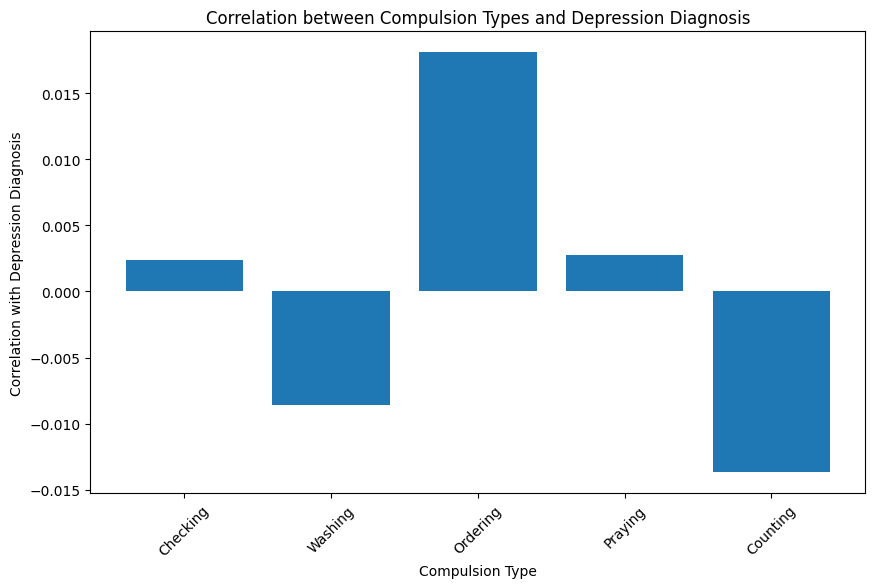

In [237]:
#code:

# Calculate the correlation between each compulsion type and Depression Diagnosis
correlations = df[['Compulsion_Type_Checking', 'Compulsion_Type_Washing', 'Compulsion_Type_Ordering',
                   'Compulsion_Type_Praying', 'Compulsion_Type_Counting', 'Depression Diagnosis']].corr()['Depression Diagnosis'][:-1]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(correlations)), correlations)
plt.xticks(range(len(correlations)), ['Checking', 'Washing', 'Ordering', 'Praying', 'Counting'], rotation=45)
plt.xlabel('Compulsion Type')
plt.ylabel('Correlation with Depression Diagnosis')
plt.title('Correlation between Compulsion Types and Depression Diagnosis')
plt.show()

What medications are most prescribed to OCD patients with depression?

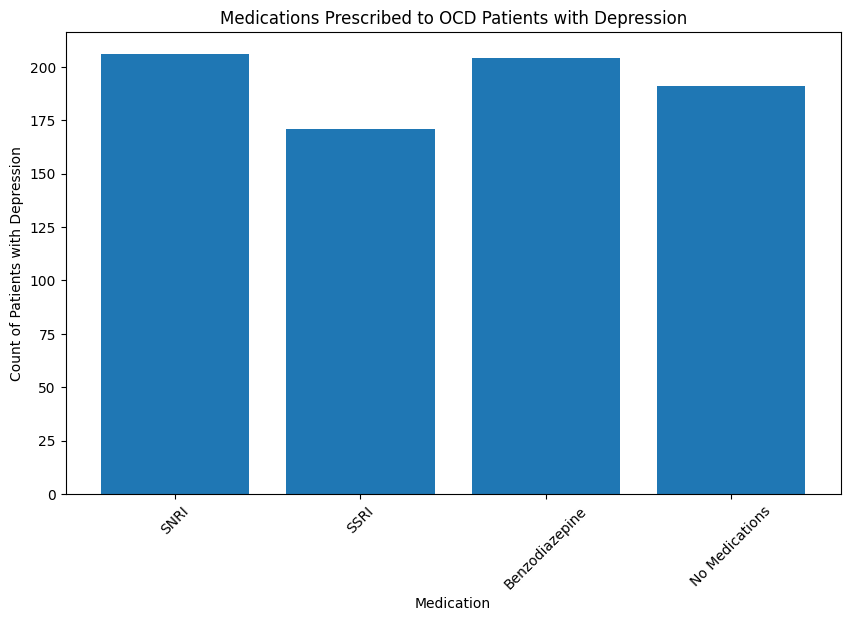

In [238]:
#code
# Filter the data to only include OCD patients with depression
depressed_patients = df[df['Depression Diagnosis'] == 1]

# Calculate the count of patients prescribed each medication
medication_counts = depressed_patients[['Medications_SNRI', 'Medications_SSRI', 'Medications_Benzodiazepine', 'Medications_No Medications']].sum()

# Graphic
plt.figure(figsize=(10, 6))
plt.bar(range(len(medication_counts)), medication_counts)
plt.xticks(range(len(medication_counts)), ['SNRI', 'SSRI', 'Benzodiazepine', 'No Medications'], rotation=45)
plt.xlabel('Medication')
plt.ylabel('Count of Patients with Depression')
plt.title('Medications Prescribed to OCD Patients with Depression')
plt.show()

In [239]:
data = df

# Check for missing values in 'Duration of Symptoms (months)'
print(data['Duration of Symptoms (months)'].isnull().sum())

# Check for invalid values (e.g., non-numeric values)
print(data['Duration of Symptoms (months)'].dtype)

# Check for missing values
print(data['Depression Diagnosis'].unique())

0
int64
[1 0]


In [248]:
# Replace missing values with mean
df["Depression Diagnosis"].fillna(df["Depression Diagnosis"].mean(), inplace=True)

print(data['Depression Diagnosis'].unique())

[1 0]


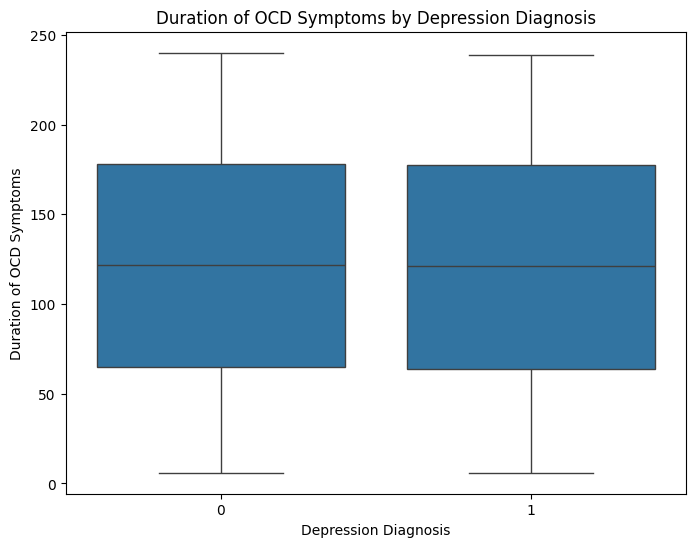

In [242]:
# How does the duration of OCD symptoms correlate with a depression diagnosis?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Depression Diagnosis', y='Duration of Symptoms (months)', data=data)
plt.xlabel('Depression Diagnosis')
plt.ylabel('Duration of OCD Symptoms')
plt.title('Duration of OCD Symptoms by Depression Diagnosis')
plt.show()


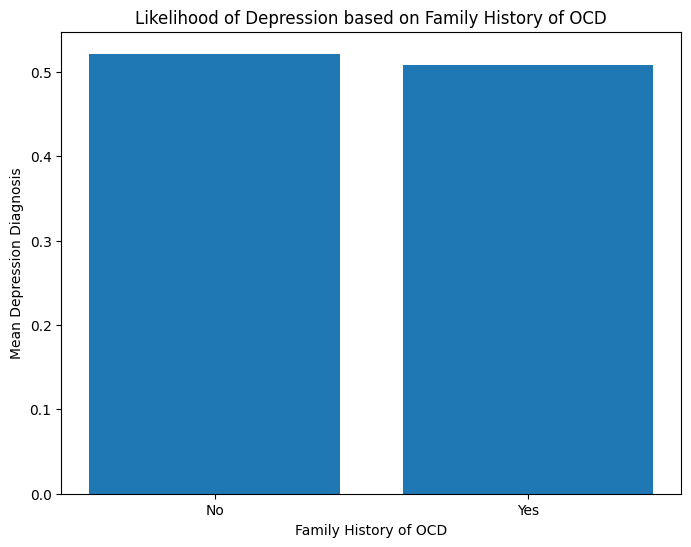

In [243]:
# Family history of OCD and likelihood of depression (Barchart)


# Grouping Family History of OCD and calculate the mean Depression Diagnosis
family_history_depression = df.groupby('Family History of OCD')['Depression Diagnosis'].mean()

# Creating a bar chart
plt.figure(figsize=(8, 6))
plt.bar(family_history_depression.index, family_history_depression.values)
plt.xlabel('Family History of OCD')
plt.ylabel('Mean Depression Diagnosis')
plt.title('Likelihood of Depression based on Family History of OCD')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [244]:
# Correlation
correlations = data.corr(method="pearson", numeric_only=True)
correlations

,Patient ID,Age,Gender,Duration of Symptoms (months),Family History of OCD,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Compulsion_Type_Checking,...,Previous Diagnoses_MDD,Previous Diagnoses_No Previous Diagnoses,Previous Diagnoses_PTSD,Previous Diagnoses_GAD,Previous Diagnoses_Panic Disorder,Obsession Type_Harm-related,Obsession Type_Contamination,Obsession Type_Symmetry,Obsession Type_Hoarding,Obsession Type_Religious
Patient ID,1.000000,0.029146,-0.034013,-0.026091,0.005894,0.019816,0.024720,-0.001634,NaN,-0.020628,...,0.017744,-0.028047,-0.046406,0.010244,0.044014,0.001966,-0.017328,0.029047,0.003224,-0.015840
Age,0.029146,1.000000,0.008982,-0.001505,0.036869,-0.003162,0.014137,-0.008181,NaN,-0.028737,...,0.023950,-0.001465,-0.003389,-0.006200,-0.012828,-0.000009,0.030493,-0.004508,0.017889,-0.046451
Gender,-0.034013,0.008982,1.000000,-0.010879,-0.022616,0.012425,-0.002448,-0.011888,NaN,0.018804,...,0.005333,-0.021576,0.019727,-0.001367,0.000413,-0.017828,0.010158,0.019065,-0.006290,-0.004928
Duration of Symptoms (months),-0.026091,-0.001505,-0.010879,1.000000,0.013290,0.007946,0.039980,0.004189,NaN,0.006856,...,0.017330,0.022707,0.001070,-0.016199,-0.025645,0.045027,-0.050522,0.018149,-0.012909,0.002522
Family History of OCD,0.005894,0.036869,-0.022616,0.013290,1.000000,-0.005018,-0.029746,-0.013732,NaN,0.006915,...,-0.020008,0.019645,0.022782,0.006790,-0.028177,-0.010060,-0.011936,-0.002928,0.004915,0.020990
Y-BOCS Score (Obsessions),0.019816,-0.003162,0.012425,0.007946,-0.005018,1.000000,0.030631,-0.000345,NaN,-0.002424,...,0.033318,-0.009859,-0.007425,-0.008107,-0.007776,-0.016192,0.027281,0.038851,-0.034775,-0.015263
Y-BOCS Score (Compulsions),0.024720,0.014137,-0.002448,0.039980,-0.029746,0.030631,1.000000,-0.001276,NaN,-0.071300,...,0.017937,-0.025011,-0.014969,-0.018103,0.039704,0.025625,0.006202,-0.035690,0.036557,-0.035193
Depression Diagnosis,-0.001634,-0.008181,-0.011888,0.004189,-0.013732,-0.000345,-0.001276,1.000000,NaN,0.002417,...,0.035536,-0.087357,0.004893,0.029021,0.022681,-0.018166,-0.007652,0.020332,0.020120,-0.014059
Anxiety Diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compulsion_Type_Checking,-0.020628,-0.028737,0.018804,0.006856,0.006915,-0.002424,-0.071300,0.002417,NaN,1.000000,...,-0.012705,-0.016644,0.012341,-0.002629,0.021005,0.022697,-0.027647,0.003825,-0.004127,0.006453


In [245]:
data.columns

Index(['Patient ID', 'Age', 'Gender', 'Duration of Symptoms (months)',
       'Family History of OCD', 'Y-BOCS Score (Obsessions)',
       'Y-BOCS Score (Compulsions)', 'Depression Diagnosis',
       'Anxiety Diagnosis', 'Compulsion_Type_Checking',
       'Compulsion_Type_Washing', 'Compulsion_Type_Ordering',
       'Compulsion_Type_Praying', 'Compulsion_Type_Counting',
       'Medications_SNRI', 'Medications_SSRI', 'Medications_Benzodiazepine',
       'Medications_No Medications', 'Ethnicity_African', 'Ethnicity_Hispanic',
       'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Marital Status_Single',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Education Level_Some College', 'Education Level_College Degree',
       'Education Level_High School', 'Education Level_Graduate Degree',
       'Previous Diagnoses_MDD', 'Previous Diagnoses_No Previous Diagnoses',
       'Previous Diagnoses_PTSD', 'Previous Diagnoses_GAD',
       'Previous Diagnoses_Panic Disorder', 'Obsessio

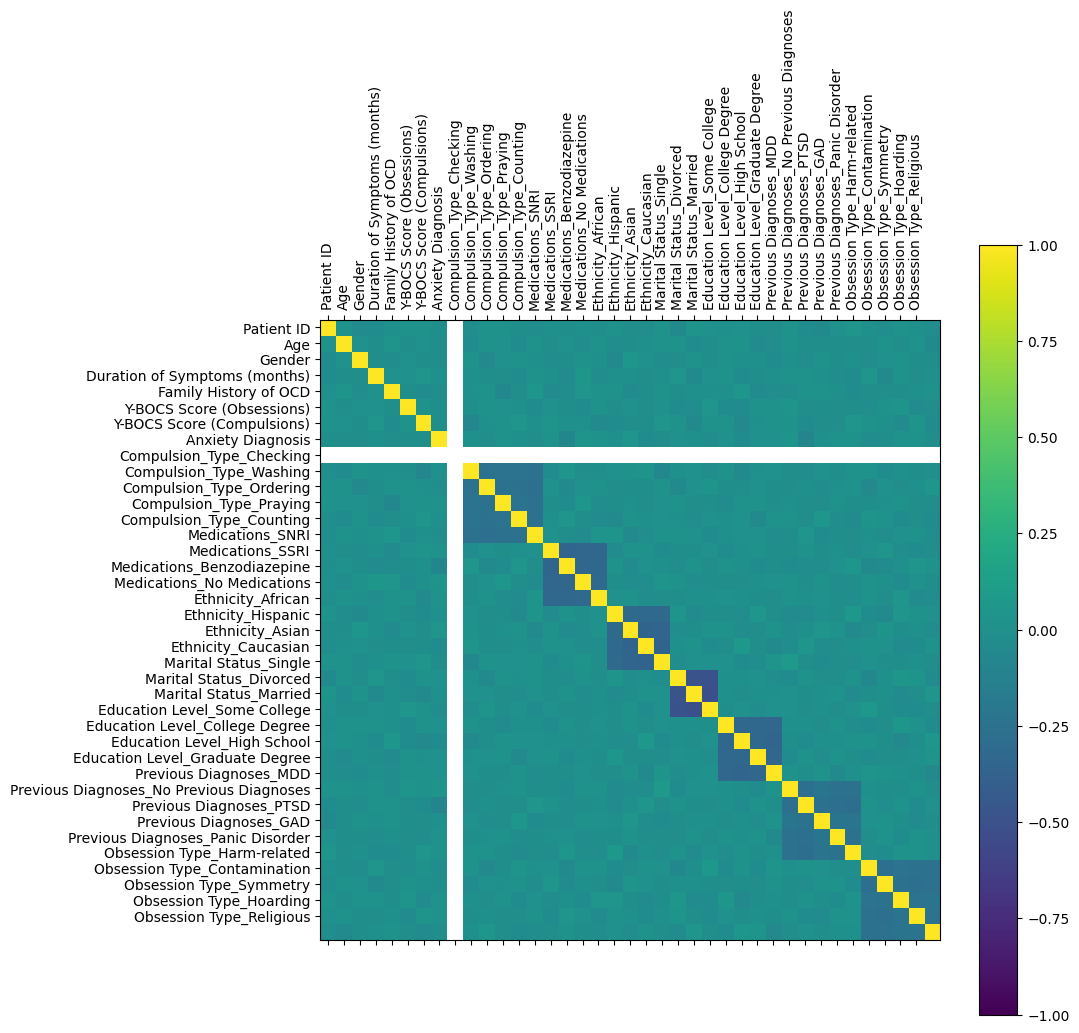

In [246]:
# Family history of OCD and likelihood of depression (Correlation in Scatterplot)

# Plotting correlations visually
fig, ax = plt.subplots(figsize=(10,10))

# Defininig subplots
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
axes_labels = data.columns.drop("Depression Diagnosis")
plt.xticks(list(range(axes_labels.size)), axes_labels, rotation=90)
plt.yticks(list(range(axes_labels.size)), axes_labels)
plt.show()


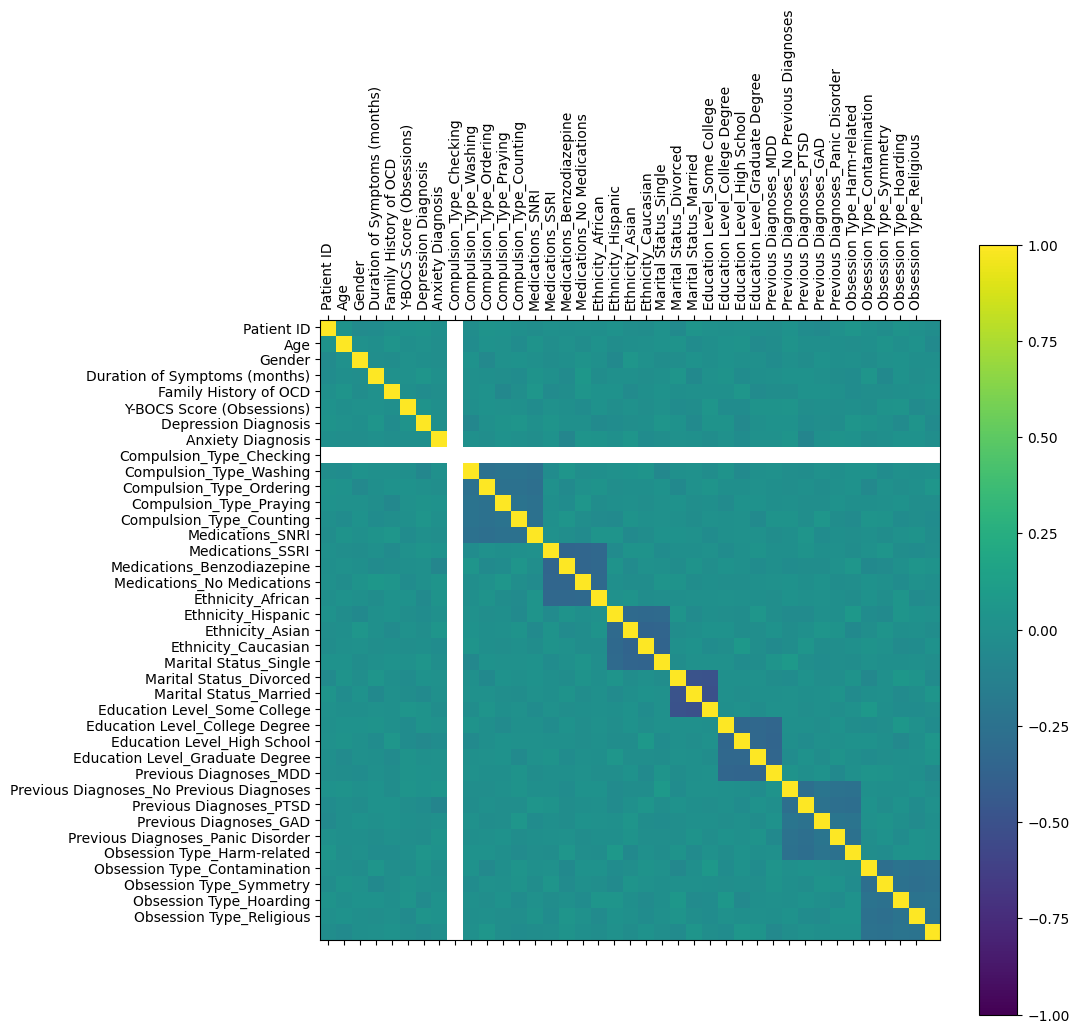

In [247]:
# Correlation between severity of OCD (Y-BOCS scores) and the likelihood of depression?

# Plotting correlations visually
fig, ax = plt.subplots(figsize=(10,10))

# Defininig subplots
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
axes_labels = data.columns.drop("Y-BOCS Score (Compulsions)", "Y-BOCS Score (Obsessions)")
plt.xticks(list(range(axes_labels.size)), axes_labels, rotation=90)
plt.yticks(list(range(axes_labels.size)), axes_labels)
plt.show()